import pandas เพื่อวิเคราะห์ข้อมูลสถิติ

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# เลือกฟอนต์ที่รองรับภาษาไทย เช่น TH Sarabun
plt.rcParams['font.family'] = ''

In [128]:
#copy path ของไฟล์data index.csv แล้วเอามาวาง
coff = pd.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/index.csv")

ข้อมูลสรุปเชิงสถิติและการกระจายตัวของข้อมูล
1.ยอดขายในแต่ละเดือนที่ขายกาแฟได้
2.ในแต่ละเดือนกาแฟในแต่ละเดื่อน
3.ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ
3.ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
4.หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
5.จำนวนลูกค้าในแต่ละวัน

In [129]:
coff.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [130]:
coff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


เตรียมข้อมูล

In [131]:
coff['month'] = coff['date'].apply(lambda x : x.split('-')[1])
coff['day'] = coff['date'].apply(lambda x : x.split('-')[2])
coff['hour'] = coff['datetime'].apply(lambda x : x.split(' ')[1][:2])
#ค่าเงินจากยูเครนฮรีฟเนีย (UAH) 25 ก.ย. 17:02 UTC 1uah = 0.79 บาท
#1 USD = 41.42  UAH
coff['money_THB'] = coff['money']*0.79

def get_time_period(hour):
    if '07' <= hour < '12':
        return 'Morning'
    elif '12' <= hour < '18':
        return 'Afternoon'
    else:
        return 'Evening'

coff['time_period'] = coff['hour'].apply(get_time_period)
coff.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,03,01,10,30.573,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,03,01,13,22.831,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,03,01,13,30.573,Afternoon


In [132]:
coff.describe()

,money,money_THB
count,1464.000000,1464.000000
mean,32.013661,25.290792
std,5.317022,4.200447
min,18.120000,14.314800
25%,27.920000,22.056800
50%,32.820000,25.927800
75%,37.720000,29.798800
max,40.000000,31.600000


หาค่ากลางหรือค่ามัธยฐาน ค่าความแปรปรวน และค่าฐานนิยม

In [133]:
mode = coff['money_THB'].mode().iloc[0]
var = coff['money_THB'].var()
med = coff['money_THB'].median()

print(f"ฐานนิยม: {mode}")
print(f"ค่าความแปรปรวน: {var}")
print(f"ค่ามัธยฐาน: {med}")

ฐานนิยม: 25.9278
ค่าความแปรปรวน: 17.64375780921006
ค่ามัธยฐาน: 25.9278


In [134]:
print(f"จำนวนแถวของข้อมูล : {coff.shape[0]}")
print(f"จำนวนแถวของข้อมูล : {coff.shape[1]}")

จำนวนแถวของข้อมูล : 1464
จำนวนแถวของข้อมูล : 11


การกระจายตัวของข้อมูลนี้ (สร้างตารางควอไทล์)

In [135]:
Q1 = coff['money_THB'].quantile(0.25)
Q3 = coff['money_THB'].quantile(0.75)
#หา Q1 Q3 ด้วย เปอร์เซ็นพาย
IQR = Q3 - Q1

print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"ค่าเฉลี่ยของข้อมูล : {coff['money_THB'].mean()}")

# Define outlier range
lower_bound = Q1 - 1.5 * IQR # ถ้าน้อยกว่าค่านี้จะเป็นค่าผิดปกติ
upper_bound = Q3 + 1.5 * IQR # ถ้ามากกว่าจะเป็นค่าผิดปกติ

print(f"lower_bound : {lower_bound}")
print(f"upper_bound : {upper_bound}")
coff2 = coff[(coff['money_THB'] >= lower_bound) & (coff['money_THB'] <= upper_bound)] # ลบ data ที่ผิดปกติออกทั้งแถว!

Q1 : 22.056800000000003
Q3 : 29.7988
IQR : 7.741999999999997
ค่าเฉลี่ยของข้อมูล : 25.290792349726775
lower_bound : 10.443800000000007
upper_bound : 41.4118


จากการตรวจสอบการกระจายของข้อมูล พบว่ามีข้อมูลที่ผิดปกติอยู่หนึ่งค่าที่ไม่สามารถอธิบายได้ว่าเกิดจากอะไร เราได้ทำการเช็ควันที่ขายกาแฟวันนั้นแล้วก็มีค่ากาแฟชนิดนี้ซึ่งไม่เกิน30สิบ แล้วก็ดูค่าเฉลี่ยของกาแฟชนิดก็ไม่เกิน 30 เช่นกัน จากนั้นเราก็ได้ตรวจสอบการใข้บัตรของลูกค้าคนนี้ก็พบว่าการที่ลูกค่ามาซื้อของวันอื่นก็ไม่ได้มีค่าที่ผิดปกติอะไร เราจึงทำการดรอปข้อมูลนี้ทิ้งไป

In [136]:
ans2 = coff[(coff['money_THB'] <= lower_bound) | (coff['money_THB'] >= upper_bound)]
print(ans2)

Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name, month, day, hour, money_THB, time_period]
Index: []


ข้อมูลของกาแฟที่สูงที่สุด (สร้างกราฟให้หน่อย)

In [137]:
result = coff2[coff2['money_THB'] == coff['money_THB'].max()]
result

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte,03,02,10,31.6,Morning
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte,03,03,10,31.6,Morning
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte,03,07,10,31.6,Morning
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte,03,07,11,31.6,Morning
60,2024-03-09,2024-03-09 11:49:37.292,cash,NaN,40.0,Hot Chocolate,03,09,11,31.6,Morning
76,2024-03-10,2024-03-10 10:06:02.960,cash,NaN,40.0,Latte,03,10,10,31.6,Morning
81,2024-03-11,2024-03-11 10:18:46.724,cash,NaN,40.0,Latte,03,11,10,31.6,Morning
82,2024-03-11,2024-03-11 11:24:15.022,cash,NaN,40.0,Cappuccino,03,11,11,31.6,Morning
89,2024-03-12,2024-03-12 10:15:00.297,cash,NaN,40.0,Latte,03,12,10,31.6,Morning
105,2024-03-14,2024-03-14 10:02:12.241,cash,NaN,40.0,Latte,03,14,10,31.6,Morning


ข้อมูลของกาแฟที่น้อยที่สุด (สร้างกราฟให้หน่อย)

In [138]:
result = coff2[coff2['money_THB'] == coff['money_THB'].min()]
result

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period
977,2024-07-18,2024-07-18 11:11:23.434,card,ANON-0000-0000-0381,18.12,Espresso,07,18,11,14.3148,Morning
1024,2024-07-24,2024-07-24 09:54:37.456,card,ANON-0000-0000-0402,18.12,Espresso,07,24,09,14.3148,Morning
1027,2024-07-24,2024-07-24 14:45:49.766,card,ANON-0000-0000-0012,18.12,Espresso,07,24,14,14.3148,Afternoon
1041,2024-07-25,2024-07-25 21:06:50.002,card,ANON-0000-0000-0404,18.12,Espresso,07,25,21,14.3148,Evening
1046,2024-07-26,2024-07-26 09:20:34.344,card,ANON-0000-0000-0059,18.12,Espresso,07,26,09,14.3148,Morning
1063,2024-07-27,2024-07-27 12:26:13.159,card,ANON-0000-0000-0040,18.12,Espresso,07,27,12,14.3148,Afternoon
1065,2024-07-27,2024-07-27 14:28:41.904,card,ANON-0000-0000-0225,18.12,Espresso,07,27,14,14.3148,Afternoon
1073,2024-07-28,2024-07-28 11:07:25.920,card,ANON-0000-0000-0012,18.12,Espresso,07,28,11,14.3148,Morning
1095,2024-07-30,2024-07-30 11:13:16.218,card,ANON-0000-0000-0426,18.12,Espresso,07,30,11,14.3148,Morning
1104,2024-07-30,2024-07-30 20:24:19.874,card,ANON-0000-0000-0434,18.12,Espresso,07,30,20,14.3148,Evening


ราคาเฉลี่ยของกาแฟแต่ละชนิด max min

In [139]:
coffee_mean = coff2.groupby(['coffee_name'])['money'].mean()
coffee_max = coff2.groupby(['coffee_name'])['money'].max()
coffee_min = coff2.groupby(['coffee_name'])['money'].min()
print("---------mean----------")
print(coffee_mean)
print("----------max----------")
print(coffee_max)
print("----------min----------")
print(coffee_min)

---------mean----------
coffee_name
Americano              26.560657
Americano with Milk    31.020776
Cappuccino             36.587448
Cocoa                  35.707059
Cortado                26.325674
Espresso               21.496825
Hot Chocolate          37.192500
Latte                  36.091772
Name: money, dtype: float64
----------max----------
coffee_name
Americano              30.0
Americano with Milk    35.0
Cappuccino             40.0
Cocoa                  40.0
Cortado                30.0
Espresso               25.0
Hot Chocolate          40.0
Latte                  40.0
Name: money, dtype: float64
----------min----------
coffee_name
Americano              23.02
Americano with Milk    27.92
Cappuccino             32.82
Cocoa                  32.82
Cortado                23.02
Espresso               18.12
Hot Chocolate          32.82
Latte                  32.82
Name: money, dtype: float64


จำนวนลูกค้าในแต่ละเดือน ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [140]:
ans = coff2['month'].value_counts().sort_index()
print(ans)

month
03    206
04    196
05    267
06    227
07    237
08    272
09     59
Name: count, dtype: int64


ยอดขายในแต่ละเดือนที่ขายกาแฟได้ ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [141]:
value = coff2.groupby(coff2['month'])['money_THB'].sum().sort_index()
value


month
03    5569.6580
04    5309.2424
05    7160.1018
06    6129.4204
07    5463.5926
08    6014.9336
09    1378.7712
Name: money_THB, dtype: float64

จำนวนการขายกาแฟในแต่ละครั้ง และยอดขาย (สร้างกราฟให้หน่อย)

In [142]:
value1 = coff2.groupby(['coffee_name']).size().sort_values()
value2 = coff2.groupby(['coffee_name'])['money_THB'].sum().sort_values()
print('จำนวนกาแฟที่ขายไป')
print(value1)
print('ยอดขายกาแฟ')
print(value2)

จำนวนกาแฟที่ขายไป
coffee_name
Cocoa                   51
Espresso                63
Hot Chocolate           80
Cortado                141
Americano              213
Cappuccino             239
Latte                  316
Americano with Milk    361
dtype: int64
ยอดขายกาแฟ
coffee_name
Espresso               1069.8970
Cocoa                  1438.6374
Hot Chocolate          2350.5660
Cortado                2932.4168
Americano              4469.3618
Cappuccino             6908.0760
Americano with Milk    8846.8150
Latte                  9009.9500
Name: money_THB, dtype: float64


ยอดขายกาแฟในแต่ละเดือน (สร้างกราฟให้หน่อย)

In [143]:
value = coff2.groupby(['month','coffee_name'])['money_THB'].mean()
value

month  coffee_name        
03     Americano              22.927556
       Americano with Milk    26.813529
       Cappuccino             30.829750
       Cocoa                  30.573000
       Cortado                22.888933
       Espresso               19.039000
       Hot Chocolate          30.666364
       Latte                  30.851146
04     Americano              22.615217
       Americano with Milk    26.478919
       Cappuccino             30.487386
       Cocoa                  30.654633
       Cortado                22.805221
       Espresso               19.298571
       Hot Chocolate          30.750446
       Latte                  30.405316
05     Americano              22.199000
       Americano with Milk    25.992090
       Cappuccino             29.853956
       Cocoa                  29.911156
       Cortado                22.056800
       Espresso               18.282575
       Hot Chocolate          29.871029
       Latte                  29.938276
06     Americ

ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ

In [144]:
value_type = coff2.groupby(coff2['month'])['cash_type'].value_counts().unstack(fill_value=0)
value_type

cash_type,card,cash
month,,
03,175,31
04,168,28
05,241,26
06,223,4
07,237,0
08,272,0
09,59,0


กราฟการจ่ายเงินในแต่ละเดือนว่าเป็นอย่างไร

<Figure size 1000x700 with 0 Axes>

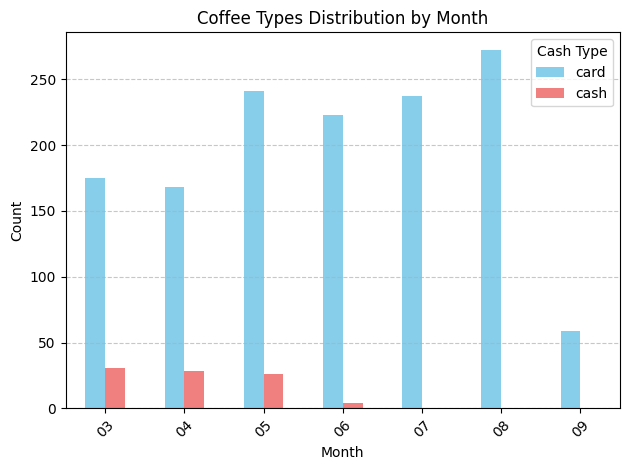

In [145]:
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 7))
value_type.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])  # กำหนดสีที่แตกต่าง
plt.title('Coffee Types Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # หมุนป้ายแกน x เพื่อให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ปรับให้พอดีกับกราฟ
plt.legend(title='Cash Type')  # เพิ่มตำนานให้กับประเภท
plt.show()

การจ่ายเงินในกาแฟแต่ละชนิด  (สร้างตาราง)

In [146]:
# สร้างตารางไขว้
crosstab_payment_drink = pd.crosstab(coff2['coffee_name'], coff2['cash_type'])
crosstab_payment_drink

cash_type,card,cash
coffee_name,,
Americano,199,14
Americano with Milk,346,15
Cappuccino,224,15
Cocoa,47,4
Cortado,136,5
Espresso,58,5
Hot Chocolate,74,6
Latte,291,25


In [147]:
import scipy.stats as stats

# ทำการทดสอบไค-สแควร์
chi2, p, dof, expected = stats.chi2_contingency(crosstab_payment_drink)

# แสดงผล
print(f"Chi-Square: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("มีความสัมพันธ์ระหว่างชนิดเครื่องดื่มและวิธีการชำระเงิน")
else:
    print("ไม่มีความสัมพันธ์ระหว่างชนิดเครื่องดื่มและวิธีการชำระเงิน")

Chi-Square: 6.831643914134172
P-value: 0.4466171982782058
ไม่มีความสัมพันธ์ระหว่างชนิดเครื่องดื่มและวิธีการชำระเงิน


การจ่ายเงินในกาแฟแต่ละจะจ่ายอยู่ที่เท่าไหร่

In [148]:
coffee_type = coff2.groupby(['coffee_name','cash_type'])['money'].mean()
coffee_type

coffee_name          cash_type
Americano            card         26.358894
                     cash         29.428571
Americano with Milk  card         30.868497
                     cash         34.533333
Cappuccino           card         36.381250
                     cash         39.666667
Cocoa                card         35.405532
                     cash         39.250000
Cortado              card         26.190588
                     cash         30.000000
Espresso             card         21.212069
                     cash         24.800000
Hot Chocolate        card         36.978378
                     cash         39.833333
Latte                card         35.786942
                     cash         39.640000
Name: money, dtype: float64

ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
เช้า (Morning): 07:00 - 12:00
บ่าย (Afternoon): 12:00 - 18:00
เย็น (Evening): 18:00 - 22:00
(สร้างกราฟให้หน่อย)

In [149]:
value1 = coff2.groupby('hour').size()
print(value1)

hour
07     20
08     83
09     83
10    159
11    141
12    114
13     93
14     90
15     83
16     91
17     94
18     90
19    113
20     74
21     93
22     43
dtype: int64


In [150]:
value2 = coff2.groupby('hour')['money_THB'].sum()
print(value2)

hour
07     476.3226
08    1908.1344
09    1952.2006
10    4135.6500
11    3362.1610
12    2828.1526
13    2326.6290
14    2271.8820
15    2110.1848
16    2303.8296
17    2494.6778
18    2351.7036
19    3082.7064
20    1933.0668
21    2397.6658
22    1090.7530
Name: money_THB, dtype: float64


In [151]:
value = coff2.groupby('time_period').size()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']}")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']}")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 486
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 565
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 413


In [152]:
value = coff2.groupby('time_period')['money'].sum()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']} บาท")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']} บาท")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']} บาท")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 14980.34 บาท
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 18146.02 บาท
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 13741.64 บาท


จำนวนคนที่มาซื้อซ้ำ

In [153]:
repeat_customers = coff2.groupby('card').filter(lambda x: len(x) > 1)
notrepeat_customers = coff2.groupby('card').filter(lambda x: len(x) == 1)
repeat_customers

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,03,01,10,30.5730,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,03,01,13,22.8310,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,03,01,13,30.5730,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
1458,2024-09-05,2024-09-05 17:05:31.684,card,ANON-0000-0000-0586,32.82,Cappuccino,09,05,17,25.9278,Afternoon
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano,09,05,20,18.1858,Evening
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino,09,05,20,25.9278,Evening
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk,09,05,21,22.0568,Evening


ส่วนใหญ่ลูกค้าที่มาซื้อซ้ำจะกินกาแฟอะไร

In [154]:
coffee_repeat = repeat_customers.groupby('coffee_name').size().sort_values()
coffee_repeat

coffee_name
Espresso                35
Cocoa                   38
Hot Chocolate           52
Cortado                111
Cappuccino             152
Americano              154
Latte                  210
Americano with Milk    257
dtype: int64

ลูกค้าที่ไม่ซื้อซ้ำซื้ออะไรไปกิน

In [155]:
coffee_notrepeat = notrepeat_customers.groupby('coffee_name').size().sort_values()
coffee_notrepeat

coffee_name
Cocoa                   9
Hot Chocolate          22
Espresso               23
Cortado                25
Americano              45
Cappuccino             72
Latte                  81
Americano with Milk    89
dtype: int64

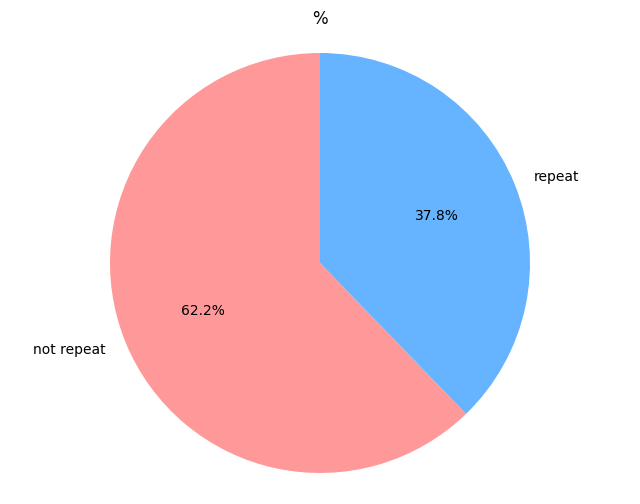

In [156]:
mabel = coff2.groupby(['card'])[['datetime']].nunique().sort_values("datetime", ascending=False)
Notrepeat = mabel[mabel['datetime']==1]
repeat =  mabel[mabel['datetime']>1]

# นับจำนวนของ Notrepeat และ repeat
notrepeat_count = len(Notrepeat)
repeat_count = len(repeat)


# สร้าง DataFrame สำหรับ Pie Chart
data_counts = {
    'type': ['not repeat', 'repeat'],
    'count': [notrepeat_count, repeat_count]
}

# แปลงเป็น DataFrame
data_df = pd.DataFrame(data_counts)

# สร้าง Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(data_df['count'], labels=data_df['type'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('%')
plt.axis('equal')  # ทำให้วงกลมเป็นวงกลมจริง
plt.show()

หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
Americano with Milk: มีน้ำร้อนมากกว่าเน้นรสกาแฟเข้มข้น
Latte: มีนมมากกว่าทำให้รสชาติของกาแฟนุ่มนวลและครีมมี่
Espresso เป็นพื้นฐานของเครื่องดื่มหลายชนิด
Cortado และ Cappuccino มีนมเป็นส่วนสำคัญ แต่มีปริมาณที่แตกต่างกัน
Americano จะมีน้ำร้อนเป็นหลัก ส่วน Latte จะมีนมมากกว่าจึงมีความนุ่มนวลกว่า
Cocoa และ Hot Chocolate เป็นเครื่องดื่มช็อกโกแลตที่ไม่มีกาแฟ

In [157]:
# รวมกลุ่มตามเดือนและชื่อกาแฟและหายอดขายรวม
value = coff2.groupby(['month', 'coffee_name'])['money_THB'].sum().reset_index()

# หาสินค้าขายดีในแต่ละเดือน
best_selling_per_month = value.loc[value.groupby('month')['money_THB'].idxmax()]

# แสดงผลลัพธ์
print(best_selling_per_month)


   month          coffee_name  money_THB
7     03                Latte  1480.8550
10    04           Cappuccino  1310.9576
23    05                Latte  1736.4200
25    06  Americano with Milk  1791.8148
33    07  Americano with Milk  1472.4020
41    08  Americano with Milk  1588.0896
49    09  Americano with Milk   463.1928


การทำการทดสอบสถิติเพื่อดูว่ายอดขายในช่วงเวลาต่าง หากคุณต้องการเปรียบเทียบยอดขายระหว่างสามช่วงเวลา (เช้า บ่าย เย็น) คุณสามารถใช้ การทดสอบ ANOVA (Analysis of Variance) ได้ ทดสอบว่า ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันไหม

In [158]:
import pandas as pd

# สร้าง pivot_table
group = coff2.groupby(['time_period', 'coffee_name'])['money'].sum()
df = group.reset_index()
df.columns = ['Time_Period', 'Coffee_Name', 'Total_Sales']

pivot_table = df.pivot(index='Time_Period', columns='Coffee_Name', values='Total_Sales').fillna(0)

# เพิ่มคอลัมน์ 'total' ที่คำนวณผลรวมของแต่ละแถว (time_period)
pivot_table['total'] = pivot_table.sum(axis=1)

# คำนวณผลรวมของแต่ละคอลัมน์ (excluding Time_Period)
total_sales = pivot_table[['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa', 'Cortado',
                           'Espresso', 'Hot Chocolate', 'Latte']].sum()

# สร้างแถว Total
total_row = pd.Series({'Americano': total_sales['Americano'],
                       'Americano with Milk': total_sales['Americano with Milk'],
                       'Cappuccino': total_sales['Cappuccino'],
                       'Cocoa': total_sales['Cocoa'],
                       'Cortado': total_sales['Cortado'],
                       'Espresso': total_sales['Espresso'],
                       'Hot Chocolate': total_sales['Hot Chocolate'],
                       'Latte': total_sales['Latte'],
                       'total': total_sales.sum()  # ผลรวมของทั้งหมด
                      }, name='Total')

# ใช้ pd.concat() เพื่อเพิ่มแถว Total
pivot_table = pd.concat([pivot_table, total_row.to_frame().T])

# แสดงผล pivot_table ที่มีแถว Total เพิ่มเข้ามา
pivot_table


,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,total
Afternoon,2680.06,4276.64,3437.96,662.92,1439.46,731.28,996.38,3921.32,18146.02
Evening,828.88,3123.56,3374.14,737.54,630.88,263.52,1294.36,3488.76,13741.64
Morning,2148.48,3798.30,1932.30,420.60,1641.58,359.50,684.66,3994.92,14980.34
Total,5657.42,11198.50,8744.40,1821.06,3711.92,1354.30,2975.40,11405.00,46868.00


1.กำหนดสมติฐาน
    H0 : ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลาไม่แตกต่างกัน
    H1 : ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันอย่างน้อย 1 คู่
2.ระดับนัยสำคัญ 0.05
3.สถิติทดสอบ Fcal = 34.37400131
4.การตัดสินใจ
    ค่าวิกฤติ: Fที่ 0.95,(7,24)

In [159]:
import scipy.stats as stats
sum_every = pivot_table['total']['Total']
sum_exponent = ((2680.06**2) + (828.88**2) + (2148.48**2) +
                (4276.64**2) + (3123.56**2) + (3798.30**2)+
                (3437.96**2) + (3374.14**2) + (1932.30**2)+
                (662.92**2) + (737.54**2) + (420.60**2) +
                (1439.46**2) + (630.88**2) + (1641.58**2) +
                (731.28**2) + (263.52**2) + (359.50**2) +
                (996.38**2) + (1294.36**2) + (684.66**2) +
                (3921.32**2) + (3488.76**2) + (3994.92**2)
                )
K = 8
L = 3
N = K*L
SSt = sum_exponent - ((sum_every**2)/N)
SStrt = [((pivot_table['Americano']['Total']**2)/L) + ((pivot_table['Americano with Milk']['Total']**2)/L) + ((pivot_table['Cappuccino']['Total']**2)/L)+
         ((pivot_table['Cocoa']['Total']**2)/L) + ((pivot_table['Cortado']['Total']**2)/L) + ((pivot_table['Espresso']['Total']**2)/L) +
         ((pivot_table['Hot Chocolate']['Total']**2)/L) + ((pivot_table['Latte']['Total']**2)/L)] - ((sum_every**2)/N)
SSb = [((pivot_table['total']['Afternoon']**2)/K) + ((pivot_table['total']['Evening']**2)/K) + ((pivot_table['total']['Morning']**2)/K)] - ((sum_every**2)/N)
SSe = SSt - SStrt - SSb
#หาdf
df_coffee = K-1
df_time = L-1
df_error = N-1

#sumsquare
sum_sstrt = SStrt
sum_ssb = SSb
sum_sse = SSe
sum_total = SSt

#mean square
MStrt = sum_sstrt/df_coffee
MSb = sum_ssb/df_time
MSe = sum_sse/df_error

#F radio
Fcal = MStrt/MSe
F2 = MSb/MSe

# กำหนดค่า
alpha = 0.05  # ระดับความเชื่อมั่น 1 - 0.95
dof1 = K-1  # degree of freedom สำหรับ m
dof2 = (K-1)*(L-1)  # degree of freedom สำหรับ n

# คำนวณค่า F
f_value = stats.f.ppf(1 - alpha, dof1, dof2)

if Fcal > f_value:
    print("ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันอย่างน้อย 1 คู่ ")
else:
    print("ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลาไม่แตกต่างกัน")



ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันอย่างน้อย 1 คู่ 


การทดสอบเพื่อดูว่ามีความแตกต่างของยอดขายกาแฟในแต่ละชนิดหรือไม่ โดยใช้การทดสอบ LSD (Least Significant Difference) หลังจากการทดสอบ ANOVA วิเคราะห์ความนิยมของกาแฟ

In [160]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# สร้างแบบจำลอง Anova
model = ols('money_THB ~ coffee_name', data=coff2).fit()

# ทำการทดสอบ ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# เปลี่ยนชื่อคอลัมน์ 'F' เป็น 'F radio'
anova_table = anova_table.rename(columns={'F': 'F radio'})

# เพิ่มคอลัมน์ mean_sq
anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']

# แสดงผลตาราง ANOVA
print(anova_table)

                   sum_sq      df    F radio  PR(>F)      mean_sq
coffee_name  19544.204479     7.0  648.49982     0.0  2792.029211
Residual      6268.613196  1456.0        NaN     NaN     4.305366


F-statistic: ค่าของ F-statistic ที่สูง (648.49982 บาท) หมายความว่า มีความแตกต่างระหว่างกลุ่มข้อมูล (ในที่นี้คือชนิดของกาแฟ) อย่างมีนัยสำคัญ

p-value(PR): p-value ที่ได้คือ 0.00 ซึ่งต่ำกว่าระดับนัยสำคัญทั่วไป (0.05 หรือ 0.01) นี้แสดงว่ามีหลักฐานเพียงพอที่จะปฏิเสธสมมติฐานว่าว่าไม่มีความแตกต่างระหว่างยอดขายกาแฟชนิดต่าง ๆ แสดงว่าข้อมูลมีความแตกต่าง
ปฏิเสธสมมติฐานจึงหา LSD ต่อ

หา LSD การเปรียบเทียบพหุคูณในแบบแผนการการทดลอง เปรียบเทียบค่าเฉลี่ยรายคู่ (C8,2) = 28 คู่

2.ระดับนัยสำคัญ 0.05
3.สถิติทดสอบ LSD =
4.การตัดสินใจ
    ค่าวิกฤติ: Fที่ 0.95,(7,24)

In [161]:
import numpy as np
import math
import scipy.stats as stats

alpha = 0.05  # ระดับความเชื่อมั่น (1 - 0.95)
t_value = stats.t.ppf(1 - alpha/2, (K-1)*(L-1))
LSD = t_value * np.sqrt(MSe*(2/L))

mean_Americano = pivot_table['Americano']['Total']/L
mean_Americano_with_Milk = pivot_table['Americano with Milk']['Total']/L
mean_Cappuccino = pivot_table['Cappuccino']['Total']/L
mean_Cocoa = pivot_table['Cocoa']['Total']/L
mean_Cortado = pivot_table['Cortado']['Total']/L
mean_Espresso = pivot_table['Espresso']['Total']/L
mean_Hot_Chocolate = pivot_table['Hot Chocolate']['Total']/L
mean_Latte = pivot_table['Latte']['Total']/L


Couple = math.factorial(K)/(math.factorial(K-2)*math.factorial(2))
#28คู่ที่ต้องเปรียบเทียบ

if (abs(mean_Americano - mean_Americano_with_Milk) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Americano_with_Milk แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Americano_with_Milk ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano - mean_Cappuccino) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cappuccino ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano - mean_Cocoa) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cocoa ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano_with_Milk - mean_Cappuccino) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cappuccino ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano_with_Milk - mean_Cocoa) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cocoa ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano_with_Milk - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano_with_Milk - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano_with_Milk - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Americano_with_Milk - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cappuccino - mean_Cocoa) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cocoa ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cappuccino - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cappuccino - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cappuccino - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Hot_Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Hot_Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cappuccino - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cocoa - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cocoa - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cocoa - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cocoa - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cortado - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cortado - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cortado - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Espresso - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Espresso - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Hot_Chocolate - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Hot Chocolate และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟHot Chocolate และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")


ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Americano_with_Milk แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแ

สรุปผลและวิหีข้อมูล

In [162]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# การทดสอบ LSD
tukey_results = pairwise_tukeyhsd(endog=coff2['money_THB'], groups=coff2['coffee_name'], alpha=0.05)
print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
          Americano Americano with Milk   3.5235    0.0   2.9793   4.0676   True
          Americano          Cappuccino   7.9212    0.0   7.3277   8.5146   True
          Americano               Cocoa   7.2257    0.0   6.2438   8.2075   True
          Americano             Cortado  -0.1856 0.9918  -0.8694   0.4981  False
          Americano            Espresso  -4.0004    0.0  -4.9037  -3.0972   True
          Americano       Hot Chocolate   8.3992    0.0   7.5733    9.225   True
          Americano               Latte   7.5296    0.0   6.9712   8.0879   True
Americano with Milk          Cappuccino   4.3977    0.0   3.8725   4.9229   True
Americano with Milk               Cocoa   3.7022    0.0     2.76   4.6443   True
Americano with Milk         

สร้าง coloum ฤดูมา

In [163]:
def categorize_season_ukraine(month):
    if month in ["12", "01", "02"]:
        return 'Winter'
    elif month in ["03", "04", "05"]:
        return 'Spring'
    elif month in ["06", "07", "08"]:
        return 'Summer'
    elif month in ["09", "10", "11"]:
        return 'Autumn'
    else:
        return 'Unknown'  # สำหรับเดือนที่ไม่ถูกต้อง


coff2['season'] = coff2['month'].apply(categorize_season_ukraine)
coff2.tail(5)

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,season
1459,2024-09-05,2024-09-05 20:30:14.964,card,ANON-0000-0000-0587,32.82,Cappuccino,09,05,20,25.9278,Evening,Autumn
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano,09,05,20,18.1858,Evening,Autumn
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino,09,05,20,25.9278,Evening,Autumn
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk,09,05,21,22.0568,Evening,Autumn
1463,2024-09-05,2024-09-05 21:27:29.969,card,ANON-0000-0000-0040,27.92,Americano with Milk,09,05,21,22.0568,Evening,Autumn


In [164]:
sales_by_season = coff2.groupby(['season'])['money_THB'].sum()
sales_by_season

season
Autumn     1378.7712
Spring    18039.0022
Summer    17607.9466
Name: money_THB, dtype: float64

เบลทำกราฟ

In [165]:
# pssst i see dead people

dsad

In [166]:
# แปลง 'date' เป็น datetime object ถ้ายังไม่ได้แปลง
coff2['date'] = pd.to_datetime(coff['date'])

# สร้างคอลัมน์ 'day_of_week' ที่เก็บชื่อวันในสัปดาห์
coff2['day_of_week'] = coff2['date'].dt.day_name()

print(coff2['day_of_week'])
# coff2.info()

0         Friday
1         Friday
2         Friday
3         Friday
4         Friday
          ...   
1459    Thursday
1460    Thursday
1461    Thursday
1462    Thursday
1463    Thursday
Name: day_of_week, Length: 1464, dtype: object


In [167]:
result = coff2.groupby(['day_of_week',"month"]).size()
result
#แบ่งเป็นรายสัปดา

day_of_week  month
Friday       03       32
             04       29
             05       37
             06       26
             07       39
             08       34
Monday       03       22
             04       35
             05       41
             06       29
             07       24
             08       41
             09        8
Saturday     03       40
             04       27
             05       24
             06       36
             07       27
             08       47
Sunday       03       23
             04       28
             05       36
             06       40
             07       24
             08       37
             09       10
Thursday     03       28
             04       24
             05       52
             06       33
             07       27
             08       44
             09       14
Tuesday      03       33
             04       30
             05       42
             06       31
             07       49
             08       35
      

บอกว่าแต่ละเดือน ขายกาแฟในวันไหนได้เงินมากสุด ซึ่งส่วนมากก็คือวันพฤหัส แสดงว่าวันพฤหัสขายดีที่สุด และ รองลงมาคือ วันอังคาร

In [168]:


# สมมุติ DataFrame coff2 มีคอลัมน์ datetime และ money
# coff2 = pd.DataFrame({
#     'datetime': [...],  # วันที่ซื้อ
#     'money': [...]      # ยอดขาย
# })

# แปลงคอลัมน์ datetime เป็น datetime object
coff2['datetime'] = pd.to_datetime(coff2['datetime'])

# สร้างคอลัมน์ใหม่สำหรับเดือน
coff2['month'] = coff2['datetime'].dt.to_period('M')

# สร้างคอลัมน์สำหรับวันในสัปดาห์
coff2['day_of_week'] = coff2['datetime'].dt.day_name()

# กรองเฉพาะวันจันทร์ถึงวันศุกร์
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
coff2_filtered = coff2[coff2['day_of_week'].isin(weekdays)]

# กลุ่มข้อมูลตามเดือนและวันในสัปดาห์ แล้วคำนวณยอดขาย
daily_sales_by_month = coff2_filtered.groupby([coff2_filtered['month'], coff2_filtered['day_of_week']])['money'].sum()

# หาวันที่มียอดขายสูงสุดในแต่ละเดือน
max_sales_day = daily_sales_by_month.groupby(level=0).idxmax()
max_sales_value = daily_sales_by_month.groupby(level=0).max()

# สร้าง DataFrame สำหรับแสดงผลลัพธ์
result = pd.DataFrame({
    'month': max_sales_day.index,
    'max_sales_day': [day[1] for day in max_sales_day],
    'max_sales_value': max_sales_value
}).reset_index(drop=True)

print(result)


     month max_sales_day  max_sales_value
0  2024-03       Tuesday          1163.20
1  2024-04        Monday          1167.52
2  2024-05      Thursday          1814.66
3  2024-06      Thursday          1117.36
4  2024-07       Tuesday          1387.68
5  2024-08      Thursday          1213.78
6  2024-09       Tuesday           513.84


จากข้อมูลทั้งหมด วัน พฤหัสบดี เป็นวันที่มียอดขายสูงสุดในหลายเดือน ซึ่งแสดงให้เห็นว่ามีการซื้อขายกาแฟในวันพฤหัสบดีมากที่สุด
รองลงมาคือวัน อังคาร ที่มียอดขายสูงในหลายเดือนเช่นกัน

กูทำไรไม่รู้ ยอดขายสูงสุดในแต่ละเดือนมั้ง ทำทำไม แชทมันทำให้กูเอง

In [169]:
# แปลงคอลัมน์ datetime เป็น datetime object
coff2['datetime'] = pd.to_datetime(coff2['datetime'])

# สร้างคอลัมน์ใหม่สำหรับเดือน
coff2['month'] = coff2['datetime'].dt.to_period('M')

# กลุ่มข้อมูลตามเดือนและวัน แล้วคำนวณยอดขาย
daily_sales_by_month = coff2.groupby([coff2['month'], coff2['datetime'].dt.day])['money'].sum()

# หาวันที่มียอดขายสูงสุดในแต่ละเดือน
max_sales_day = daily_sales_by_month.groupby(level=0).idxmax()
max_sales_value = daily_sales_by_month.groupby(level=0).max()

# สร้าง DataFrame สำหรับแสดงผลลัพธ์
result = pd.DataFrame({
    'max_sales_day': max_sales_day,
    'max_sales_value': max_sales_value
}).reset_index()

print(result)

     month  max_sales_day  max_sales_value
0  2024-03   (2024-03, 9)           479.40
1  2024-04  (2024-04, 20)           494.30
2  2024-05  (2024-05, 23)           575.40
3  2024-06   (2024-06, 4)           474.18
4  2024-07  (2024-07, 30)           650.48
5  2024-08  (2024-08, 15)           446.72
6  2024-09   (2024-09, 3)           513.84


In [170]:
# Group by 'day_of_week' and 'month', then calculate the size of each group (number of sales)
daily_sales_by_month = coff2.groupby(['day_of_week', 'month']).size()

# Calculate the mean sales for each day of the week across all months
result = daily_sales_by_month.groupby('day_of_week').mean()

print(result)

day_of_week
Friday       32.833333
Monday       28.571429
Saturday     33.500000
Sunday       28.285714
Thursday     31.714286
Tuesday      33.857143
Wednesday    29.857143
dtype: float64


In [171]:
result = coff2.groupby(['day_of_week']).size()
result
#แบ่งเป็นรายเดือน

day_of_week
Friday       197
Monday       200
Saturday     201
Sunday       198
Thursday     222
Tuesday      237
Wednesday    209
dtype: int64

In [172]:
# คำนวณยอดขาย (ใช้เงินหรือจำนวน) ตามวันในสัปดาห์
sales_by_day = coff2.groupby('day_of_week')['money'].sum()
print(sales_by_day)
# หาวันที่มียอดขายสูงสุด
max_sales_day = sales_by_day.idxmax()
max_sales_value = sales_by_day.max()

print(f'วันที่มียอดขายสูงสุดคือ: {max_sales_day} ด้วยยอดขาย: {max_sales_value}')


day_of_week
Friday       6306.20
Monday       6391.66
Saturday     6479.50
Sunday       6421.24
Thursday     7086.10
Tuesday      7627.62
Wednesday    6555.68
Name: money, dtype: float64
วันที่มียอดขายสูงสุดคือ: Tuesday ด้วยยอดขาย: 7627.62
